In [5]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from utils.registration import est_lin_transf, est_nl_transf, apply_lin_transf, apply_nl_transf
from utils.images import resample_img



In [37]:
fix_img = sitk.ReadImage('./data/common_40_image.nii.gz', sitk.sitkFloat32)
fix_mask = sitk.ReadImage('./data/common_40_mask_4_2.nii.gz', sitk.sitkFloat32)
fix_img_data = sitk.GetArrayFromImage(fix_img)
fix_mask_data = sitk.GetArrayFromImage(fix_mask)

In [33]:
np.unique(fix_mask_data)

array([0., 2., 4.], dtype=float32)

In [29]:
fix_mask.GetSize()

(512, 512, 205)

In [23]:
np.where(fix_img_data == 2)

(array([  0,   0,   0, ..., 285, 285, 285]),
 array([133, 138, 143, ..., 441, 454, 465]),
 array([ 47,  40, 242, ..., 140, 276, 465]))

In [26]:
mov_img_1 = sitk.ReadImage('./data/common_42_image.nii.gz',sitk.sitkFloat32)
mov_img_1_data = sitk.GetArrayFromImage(mov_img_1)

In [27]:
lin_tranf = est_lin_transf(fix_img, mov_img_1,fix_mask)

--------
Linear registration:
Final mean squares value: 147695.2499521349
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Number of iterations: 18
--------


In [13]:
fix_img.GetSize()

(512, 512, 286)

In [14]:
mov_img_1.GetSize()

(512, 512, 291)

In [30]:
new_mov = apply_lin_transf(fix_img,mov_img_1,lin_tranf)
new_mov_data = sitk.GetArrayFromImage(new_mov)


In [ ]:
fix_mask_data[50,]

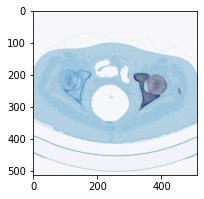

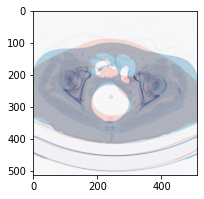

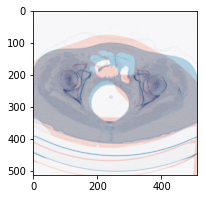

In [38]:
idx = 80
plt.figure(figsize=(10,20))
plt.subplot(131)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(fix_mask_data[idx], cmap = 'Reds', alpha = 0.3)

plt.figure(figsize=(10,20))
plt.subplot(132)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(mov_img_1_data[idx], cmap = 'Reds',alpha = 0.3)

plt.figure(figsize=(10,20))
plt.subplot(133)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(new_mov_data[idx], cmap = 'Reds',alpha = 0.3)

In [4]:
re_fix_img= resample_img(fix_img)
# re_fix_mask= resample_img(fix_mask)
re_mov_img_1= resample_img(mov_img_1)

In [6]:
re_fix_img.GetSize()

(512, 512, 286)

In [27]:
re_mov_img_1.GetSize()

(512, 512, 205)

In [7]:
re_fix_img_data = sitk.GetArrayFromImage(re_fix_img)
re_fix_mask_data = sitk.GetArrayFromImage(fix_mask)
re_mov_img_1_data = sitk.GetArrayFromImage(re_mov_img_1)

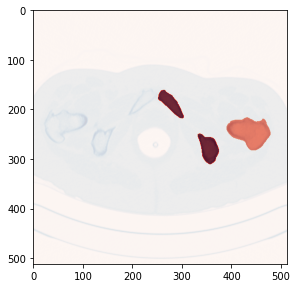

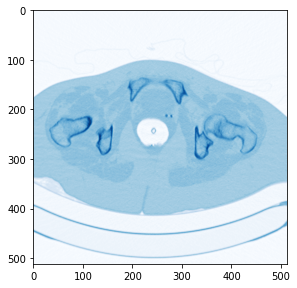

In [8]:
idx = 50
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(re_fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(re_fix_mask_data[idx], cmap = 'Reds', alpha = 0.8)

plt.figure(figsize=(10,20))
plt.subplot(122)
plt.imshow(re_mov_img_1_data[idx],cmap='Blues')

In [18]:
np.unique(fix_mask_data)
new_fix_mask_data = np.zeros_like(fix_mask_data)
new_fix_mask_data[np.where(fix_mask_data==2)]=1
new_fix_mask_data[np.where(fix_mask_data==4)]=1

In [19]:
new_fix_mask = sitk.GetImageFromArray(new_fix_mask_data)

In [27]:
np.unique(fix_mask_data)
fix_mask_data.shape

(286, 512, 512)

In [21]:
a_mask = sitk.ReadImage('./data/common_40_mask.nii.gz', sitk.sitkFloat32)


In [28]:
a_mask_data = sitk.GetArrayFromImage(a_mask)
np.unique(a_mask_data)
a_mask_data.shape

(286, 512, 512)

In [30]:
lin_tranf = est_lin_transf(re_fix_img, re_mov_img_1,a_mask)

--------
Linear registration:
Final mean squares value: 125507.0980536958
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 43.
Number of iterations: 43
--------


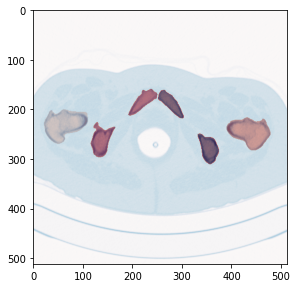

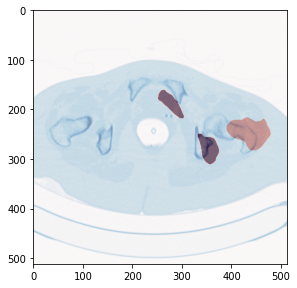

In [43]:
idx = 50
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(re_fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(a_mask_data[idx], cmap = 'Reds', alpha = 0.5)

plt.figure(figsize=(10,20))
plt.subplot(122)
plt.imshow(re_mov_img_1_data[idx], cmap='Blues') # fixed image
plt.imshow(fix_mask_data[idx], cmap = 'Reds',alpha = 0.5)

In [100]:
mov_img_1_data.shape

(291, 512, 512)

In [38]:
mov_img_resampled = apply_lin_transf(re_fix_img, re_mov_img_1, lin_tranf)

In [39]:
mov_img_resampled_data = sitk.GetArrayFromImage(mov_img_resampled)

Text(0.5, 1.0, 'Reference image and moving image')

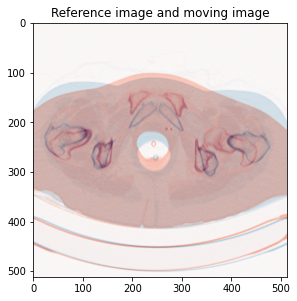

In [40]:
idx = 50
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(re_fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(re_mov_img_1_data[idx], cmap = 'Reds', alpha = 0.5)
plt.title('Reference image and moving image')

Text(0.5, 1.0, 'Reference image and moving image')

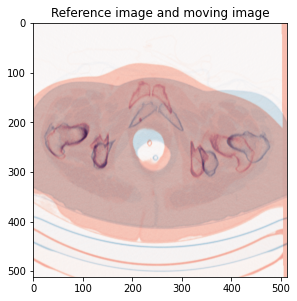

In [41]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(re_fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(mov_img_resampled_data[idx], cmap = 'Reds', alpha = 0.5)
plt.title('Reference image and moving image')

In [8]:
# image_viewer = sitk.ImageViewer()
# image_viewer.SetApplication('/usr/bin/itksnap')
# image_viewer.Execute(fix_img)

Text(0.5, 1.0, 'Reference image and masks')

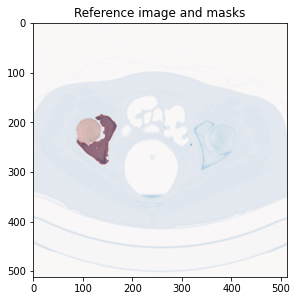

In [17]:
idx = 90
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(fix_mask_data_2c[idx], cmap = 'Reds', alpha = 0.5)
plt.title('Reference image and masks')

In [19]:
np.unique(fix_mask_data)

array([0., 1., 2., 3., 4., 5.], dtype=float32)

In [18]:
np.unique(fix_mask_data_2c)

array([0., 1., 3.], dtype=float32)

In [3]:
g_fix_img = sitk.ReadImage('./data/g1_53_image.nii.gz', sitk.sitkFloat32)
g_fix_mask = sitk.ReadImage('./data/g1_53_mask.nii.gz', sitk.sitkFloat32)
g_fix_img_data = sitk.GetArrayFromImage(g_fix_img)
g_fix_mask_data = sitk.GetArrayFromImage(g_fix_mask)

SimpleITK.SimpleITK.Image

Text(0.5, 1.0, 'Reference image')

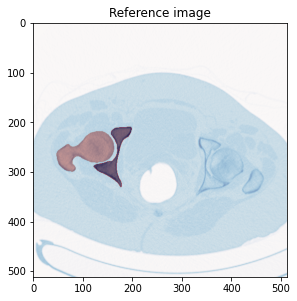

In [4]:
idx = 90
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(g_fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(g_fix_mask_data[idx], cmap = 'Reds', alpha = 0.5)
plt.title('Reference image')